In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
import wandb
import nltk
from nltk.stem.porter import *
from torch.nn import *
from torch.optim import *
import numpy as np
import pandas as pd
import torch,torchvision
import random
from tqdm import *
from torch.utils.data import Dataset,DataLoader
import cv2,json,threading
from tqdm import tqdm
stemmer = PorterStemmer()
ignore_files = ['analysis.ipynb', '.ipynb_checkpoints','data_creation.py']

In [2]:
data1 = pd.read_csv('./US_youtube_trending_data.csv')

In [3]:
data2 = pd.read_csv('./USvideos.csv')

In [4]:
files = list(os.listdir('./'))
files.remove('US_youtube_trending_data.csv')
files.remove('USvideos.csv')
files.remove('.ipynb_checkpoints')
files.remove('analytics.ipynb')
files.remove('data_creation.py')
files.remove('.virtual_documents')

In [5]:
for file in tqdm(files):
    if len(file.split('_')) > 1:
        data1 = data1.append(pd.read_csv(f'./{file}'))
    else:
        data2 = data2.append(pd.read_csv(f'./{file}',encoding='latin-1'))

100%|███████████████████████| 19/19 [00:16<00:00,  1.18it/s]


In [6]:
data1.rename(columns={'publishedAt':'publish_time','channelTitle':'channel_title','categoryId':'category_id','view_count':'views'},inplace=True)

In [7]:
data = data1.append(data2)

In [8]:
data.drop(['channelId','description','video_error_or_removed'],axis=1,inplace=True)

In [9]:
data.dropna(inplace=True)

In [10]:
publish_times = []
for publish_time in tqdm(data['publish_time']):
    publish_time = publish_time.split('-')
    publish_time[2] = publish_time[2][:2]
    publish_time = publish_time[0] + ' ' + publish_time[1] + ' ' + publish_time[2]
    publish_times.append(publish_time)

100%|████████| 1467949/1467949 [00:01<00:00, 1298838.76it/s]


In [11]:
data['publish_time'] = publish_times

In [12]:
data = data.drop(['video_id','title','channel_title','thumbnail_link'],axis=1)

In [13]:
data.head()

,publish_time,category_id,trending_date,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,2020 08 11,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False
1,2020 08 11,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False
2,2020 08 11,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,False,False
3,2020 08 11,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,False,False
4,2020 08 11,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,False,False


In [14]:
trending_dates = []
for trending_date in tqdm(data['trending_date']):
    try:
        trending_date = trending_date.split('-')
        trending_date[2] = trending_date[2][:2]
    except:
        trending_date = trending_date[0].split('.')
        trending_date[2] = trending_date[2][:2]
    
    trending_date = trending_date[0] + ' ' + trending_date[1] + ' ' + trending_date[2]
    trending_dates.append(trending_date)
data['trending_date'] = trending_dates 

100%|████████| 1467949/1467949 [00:01<00:00, 1192455.00it/s]


In [15]:
def tokenize(sentence):
    new_words = []
    for word in nltk.word_tokenize(sentence.lower()):
        new_words.append(stemmer.stem(word))
    return new_words

In [16]:
def bag_of_words(sentence:list,words:list):
    bag = np.zeros(len(words))
    for i,word in enumerate(words):
        if word in sentence:
            bag[i] = 1.0
    return bag

In [17]:
bag_of_words(['hi'],['hi','how','hi'])

array([1., 0., 1.])

In [18]:
tokenize(data['tags'].iloc[0])

['brawadis|prank|basketball|skits|ghost|funni',
 'videos|vlog|vlogging|nba|browadis|challenges|bmw',
 'i8|faz',
 'rug|faz',
 'rug',
 'brother|mama',
 'rug',
 'and',
 'papa',
 'rug']

In [19]:
import seaborn as sns

<AxesSubplot:>

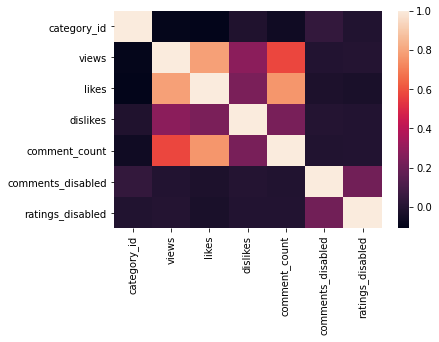

In [20]:
sns.heatmap(data.corr())